In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import argparse
import os
import time
import random
import maxflow
import tensorflow as tf
from tensorflow import keras

In [2]:
def convertBinarytoDecimal(binary):
    binary = binary.astype(np.int)
    decimal = int("".join(str(x) for x in binary), 2)
    max = pow(2,len(binary))-1
    return int(decimal*(255/max))

def lbp(block, center, tau=25):
    arr = np.zeros((3,3),np.float32)
    block = block.astype(np.int32)
    center = (np.int32)(center)
    for i in range(3):
        for j in range(3):
            if (block[i][j]<center):
                arr[i][j] = 0
            else:
                arr[i][j] = 1
    return arr.ravel()

def mclbp(blueBlock, greenBlock, redBlock, tau=0):
    blue = lbp(blueBlock, blueBlock[1][1])
    green = lbp(greenBlock, greenBlock[1][1])
    red = lbp(redBlock, redBlock[1][1])
    return np.concatenate((blue, green, red))

In [3]:
#dataSet: "cifar10" or "mnist"   #dataPart: "train" or "test"
def extract_MCLBP(frame, dataSet, dataPart, orderNumber, tau=5):
    H = np.shape(frame)[0]
    W = np.shape(frame)[1]
    g = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    blue = frame[:,:,0]
    green = frame[:,:,1]
    red = frame[:,:,2]
    
    lsbp = np.zeros((H-2, W-2), np.int)
    for i in range(H-2):
        for j in range(W-2):
            lsbp[i,j] = convertBinarytoDecimal(mclbp(blue[i:i+3,j:j+3], green[i:i+3,j:j+3], red[i:i+3,j:j+3]))
    saveImgFeature(lsbp, dataSet, dataPart, orderNumber)
    return lsbp

def saveImgFeature(lsbp, dataSet, dataPart, orderNumber):
    cv2.imwrite(f'C:/Users/MINH LE/Desktop/TraditionalvsCNN/Additional Experiments/minh_dataset/{dataSet}/mclbp/{dataPart}/img{orderNumber}.jpg', lsbp)

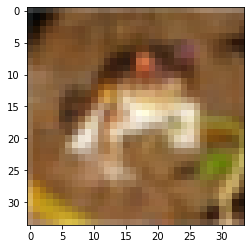

In [4]:
plt.imshow(cv2.imread(f"C:/Users/MINH LE/Desktop/TraditionalvsCNN/Additional Experiments/minh_dataset/cifar10/origin/train/img0.png"))

(32, 32)


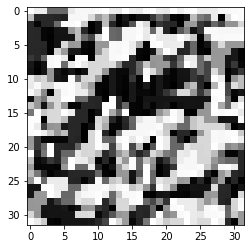

In [5]:
lsbp = extract_MCLBP(cv2.imread(f"C:/Users/MINH LE/Desktop/TraditionalvsCNN/Additional Experiments/minh_dataset/cifar10/origin/train/img0.png"), "cifar10", "train", 0)
print(np.shape(lsbp))
plt.imshow(lsbp, cmap='gray')

(30, 30)


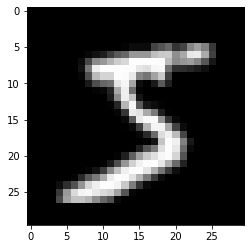

In [6]:
plt.imshow(cv2.imread(f"C:/Users/MINH LE/Desktop/TraditionalvsCNN/Additional Experiments/minh_dataset/mnist/origin/train/img0.png"))
print(np.shape(cv2.imread(f"C:/Users/MINH LE/Desktop/TraditionalvsCNN/Additional Experiments/minh_dataset/mnist/origin/train/img0.png", 0)))

In [7]:
#lsbp = extract_MCLBP(cv2.imread(f"dataset5/mnist/origin/train/img0.jpg"), "mnist", "train", 0)
#print(np.shape(lsbp))
#plt.imshow(lsbp, cmap='gray')

In [4]:
(train_images1, train_labels1), (test_images1, test_labels1) = keras.datasets.cifar10.load_data()
(train_images2, train_labels2), (test_images2, test_labels2) = keras.datasets.mnist.load_data()

In [9]:
#cifar10
np.shape(train_images1), np.shape(train_labels1), np.shape(test_images1), np.shape(test_labels1)

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [10]:
#mnist
np.shape(train_images2), np.shape(train_labels2), np.shape(test_images2), np.shape(test_labels2)

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [11]:
#cifar10 - train - 50000 - 32,32,3
for i in range(np.shape(train_images1)[0]):
    lsbp = extract_MCLBP(cv2.imread(f"C:/Users/MINH LE/Desktop/TraditionalvsCNN/Additional Experiments/minh_dataset/cifar10/origin/train/img{i}.png"), "cifar10", "train", i)
    print(f'Image {i} ({np.shape(lsbp)}): cifar10 - train - 50000 - 32,32,3')

Image 0 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18 ((32, 32)):

Image 149 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 150 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 151 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 152 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 153 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 154 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 155 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 156 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 157 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 158 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 159 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 160 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 161 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 162 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 163 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 164 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 165 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 166 ((32, 32)): cifar10 - train - 50000 - 

Image 299 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 300 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 301 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 302 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 303 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 304 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 305 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 306 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 307 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 308 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 309 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 310 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 311 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 312 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 313 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 314 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 315 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 316 ((32, 32)): cifar10 - train - 50000 - 

Image 446 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 447 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 448 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 449 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 450 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 451 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 452 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 453 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 454 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 455 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 456 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 457 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 458 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 459 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 460 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 461 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 462 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 463 ((32, 32)): cifar10 - train - 50000 - 

Image 597 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 598 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 599 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 600 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 601 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 602 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 603 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 604 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 605 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 606 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 607 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 608 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 609 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 610 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 611 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 612 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 613 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 614 ((32, 32)): cifar10 - train - 50000 - 

Image 748 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 749 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 750 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 751 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 752 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 753 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 754 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 755 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 756 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 757 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 758 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 759 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 760 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 761 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 762 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 763 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 764 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 765 ((32, 32)): cifar10 - train - 50000 - 

Image 895 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 896 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 897 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 898 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 899 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 900 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 901 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 902 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 903 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 904 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 905 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 906 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 907 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 908 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 909 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 910 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 911 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 912 ((32, 32)): cifar10 - train - 50000 - 

Image 1041 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1042 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1043 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1044 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1045 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1046 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1047 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1048 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1049 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1050 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1051 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1052 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1053 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1054 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1055 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1056 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1057 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1058 ((32, 32)): cifar10 

Image 1189 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1190 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1191 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1192 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1193 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1194 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1195 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1196 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1197 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1198 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1199 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1200 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1201 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1202 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1203 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1204 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1205 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1206 ((32, 32)): cifar10 

Image 1335 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1336 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1337 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1338 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1339 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1340 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1341 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1342 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1343 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1344 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1345 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1346 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1347 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1348 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1349 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1350 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1351 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1352 ((32, 32)): cifar10 

Image 1481 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1482 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1483 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1484 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1485 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1486 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1487 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1488 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1489 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1490 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1491 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1492 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1493 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1494 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1495 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1496 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1497 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1498 ((32, 32)): cifar10 

Image 1627 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1628 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1629 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1630 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1631 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1632 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1633 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1634 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1635 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1636 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1637 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1638 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1639 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1640 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1641 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1642 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1643 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1644 ((32, 32)): cifar10 

Image 1773 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1774 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1775 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1776 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1777 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1778 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1779 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1780 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1781 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1782 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1783 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1784 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1785 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1786 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1787 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1788 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1789 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1790 ((32, 32)): cifar10 

Image 1918 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1919 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1920 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1921 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1922 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1923 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1924 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1925 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1926 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1927 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1928 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1929 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1930 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1931 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1932 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1933 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1934 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1935 ((32, 32)): cifar10 

Image 2065 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2066 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2067 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2068 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2069 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2070 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2071 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2072 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2073 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2074 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2075 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2076 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2077 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2078 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2079 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2080 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2081 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2082 ((32, 32)): cifar10 

Image 2212 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2213 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2214 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2215 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2216 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2217 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2218 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2219 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2220 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2221 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2222 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2223 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2224 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2225 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2226 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2227 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2228 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2229 ((32, 32)): cifar10 

Image 2357 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2358 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2359 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2360 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2361 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2362 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2363 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2364 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2365 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2366 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2367 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2368 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2369 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2370 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2371 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2372 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2373 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2374 ((32, 32)): cifar10 

Image 2501 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2502 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2503 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2504 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2505 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2506 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2507 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2508 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2509 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2510 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2511 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2512 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2513 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2514 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2515 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2516 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2517 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2518 ((32, 32)): cifar10 

Image 2647 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2648 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2649 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2650 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2651 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2652 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2653 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2654 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2655 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2656 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2657 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2658 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2659 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2660 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2661 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2662 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2663 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2664 ((32, 32)): cifar10 

Image 2793 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2794 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2795 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2796 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2797 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2798 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2799 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2800 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2801 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2802 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2803 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2804 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2805 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2806 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2807 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2808 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2809 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2810 ((32, 32)): cifar10 

Image 2939 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2940 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2941 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2942 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2943 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2944 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2945 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2946 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2947 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2948 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2949 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2950 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2951 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2952 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2953 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2954 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2955 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2956 ((32, 32)): cifar10 

Image 3087 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3088 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3089 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3090 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3091 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3092 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3093 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3094 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3095 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3096 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3097 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3098 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3099 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3100 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3101 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3102 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3103 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3104 ((32, 32)): cifar10 

Image 3233 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3234 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3235 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3236 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3237 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3238 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3239 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3240 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3241 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3242 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3243 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3244 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3245 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3246 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3247 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3248 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3249 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3250 ((32, 32)): cifar10 

Image 3377 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3378 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3379 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3380 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3381 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3382 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3383 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3384 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3385 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3386 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3387 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3388 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3389 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3390 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3391 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3392 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3393 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3394 ((32, 32)): cifar10 

Image 3523 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3524 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3525 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3526 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3527 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3528 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3529 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3530 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3531 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3532 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3533 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3534 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3535 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3536 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3537 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3538 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3539 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3540 ((32, 32)): cifar10 

Image 3669 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3670 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3671 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3672 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3673 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3674 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3675 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3676 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3677 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3678 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3679 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3680 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3681 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3682 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3683 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3684 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3685 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3686 ((32, 32)): cifar10 

Image 3817 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3818 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3819 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3820 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3821 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3822 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3823 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3824 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3825 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3826 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3827 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3828 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3829 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3830 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3831 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3832 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3833 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3834 ((32, 32)): cifar10 

Image 3961 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3962 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3963 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3964 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3965 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3966 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3967 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3968 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3969 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3970 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3971 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3972 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3973 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3974 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3975 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3976 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3977 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3978 ((32, 32)): cifar10 

Image 4108 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4109 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4110 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4111 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4112 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4113 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4114 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4115 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4116 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4117 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4118 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4119 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4120 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4121 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4122 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4123 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4124 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4125 ((32, 32)): cifar10 

Image 4255 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4256 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4257 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4258 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4259 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4260 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4261 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4262 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4263 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4264 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4265 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4266 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4267 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4268 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4269 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4270 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4271 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4272 ((32, 32)): cifar10 

Image 4400 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4401 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4402 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4403 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4404 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4405 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4406 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4407 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4408 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4409 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4410 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4411 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4412 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4413 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4414 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4415 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4416 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4417 ((32, 32)): cifar10 

Image 4546 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4547 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4548 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4549 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4550 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4551 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4552 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4553 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4554 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4555 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4556 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4557 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4558 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4559 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4560 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4561 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4562 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4563 ((32, 32)): cifar10 

Image 4690 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4691 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4692 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4693 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4694 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4695 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4696 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4697 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4698 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4699 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4700 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4701 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4702 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4703 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4704 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4705 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4706 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4707 ((32, 32)): cifar10 

Image 4836 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4837 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4838 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4839 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4840 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4841 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4842 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4843 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4844 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4845 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4846 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4847 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4848 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4849 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4850 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4851 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4852 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4853 ((32, 32)): cifar10 

Image 4983 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4984 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4985 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4986 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4987 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4988 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4989 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4990 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4991 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4992 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4993 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4994 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4995 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4996 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4997 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4998 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4999 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5000 ((32, 32)): cifar10 

Image 5128 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5129 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5130 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5131 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5132 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5133 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5134 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5135 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5136 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5137 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5138 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5139 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5140 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5141 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5142 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5143 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5144 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5145 ((32, 32)): cifar10 

Image 5272 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5273 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5274 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5275 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5276 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5277 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5278 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5279 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5280 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5281 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5282 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5283 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5284 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5285 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5286 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5287 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5288 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5289 ((32, 32)): cifar10 

Image 5418 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5419 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5420 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5421 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5422 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5423 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5424 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5425 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5426 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5427 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5428 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5429 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5430 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5431 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5432 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5433 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5434 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5435 ((32, 32)): cifar10 

Image 5564 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5565 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5566 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5567 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5568 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5569 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5570 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5571 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5572 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5573 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5574 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5575 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5576 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5577 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5578 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5579 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5580 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5581 ((32, 32)): cifar10 

Image 5709 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5710 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5711 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5712 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5713 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5714 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5715 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5716 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5717 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5718 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5719 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5720 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5721 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5722 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5723 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5724 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5725 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5726 ((32, 32)): cifar10 

Image 5857 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5858 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5859 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5860 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5861 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5862 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5863 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5864 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5865 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5866 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5867 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5868 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5869 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5870 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5871 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5872 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5873 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5874 ((32, 32)): cifar10 

Image 6003 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6004 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6005 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6006 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6007 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6008 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6009 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6010 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6011 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6012 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6013 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6014 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6015 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6016 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6017 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6018 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6019 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6020 ((32, 32)): cifar10 

Image 6150 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6151 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6152 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6153 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6154 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6155 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6156 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6157 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6158 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6159 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6160 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6161 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6162 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6163 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6164 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6165 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6166 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6167 ((32, 32)): cifar10 

Image 6296 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6297 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6298 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6299 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6300 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6301 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6302 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6303 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6304 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6305 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6306 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6307 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6308 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6309 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6310 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6311 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6312 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6313 ((32, 32)): cifar10 

Image 6443 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6444 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6445 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6446 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6447 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6448 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6449 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6450 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6451 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6452 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6453 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6454 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6455 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6456 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6457 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6458 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6459 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6460 ((32, 32)): cifar10 

Image 6590 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6591 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6592 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6593 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6594 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6595 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6596 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6597 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6598 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6599 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6600 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6601 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6602 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6603 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6604 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6605 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6606 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6607 ((32, 32)): cifar10 

Image 6734 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6735 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6736 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6737 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6738 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6739 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6740 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6741 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6742 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6743 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6744 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6745 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6746 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6747 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6748 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6749 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6750 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6751 ((32, 32)): cifar10 

Image 6881 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6882 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6883 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6884 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6885 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6886 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6887 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6888 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6889 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6890 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6891 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6892 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6893 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6894 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6895 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6896 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6897 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6898 ((32, 32)): cifar10 

Image 7027 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7028 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7029 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7030 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7031 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7032 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7033 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7034 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7035 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7036 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7037 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7038 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7039 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7040 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7041 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7042 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7043 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7044 ((32, 32)): cifar10 

Image 7174 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7175 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7176 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7177 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7178 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7179 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7180 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7181 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7182 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7183 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7184 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7185 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7186 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7187 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7188 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7189 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7190 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7191 ((32, 32)): cifar10 

Image 7321 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7322 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7323 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7324 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7325 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7326 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7327 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7328 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7329 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7330 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7331 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7332 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7333 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7334 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7335 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7336 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7337 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7338 ((32, 32)): cifar10 

Image 7466 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7467 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7468 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7469 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7470 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7471 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7472 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7473 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7474 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7475 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7476 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7477 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7478 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7479 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7480 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7481 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7482 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7483 ((32, 32)): cifar10 

Image 7611 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7612 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7613 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7614 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7615 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7616 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7617 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7618 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7619 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7620 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7621 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7622 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7623 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7624 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7625 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7626 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7627 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7628 ((32, 32)): cifar10 

Image 7759 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7760 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7761 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7762 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7763 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7764 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7765 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7766 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7767 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7768 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7769 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7770 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7771 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7772 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7773 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7774 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7775 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7776 ((32, 32)): cifar10 

Image 7905 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7906 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7907 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7908 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7909 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7910 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7911 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7912 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7913 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7914 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7915 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7916 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7917 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7918 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7919 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7920 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7921 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7922 ((32, 32)): cifar10 

Image 8052 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8053 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8054 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8055 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8056 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8057 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8058 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8059 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8060 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8061 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8062 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8063 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8064 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8065 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8066 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8067 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8068 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8069 ((32, 32)): cifar10 

Image 8197 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8198 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8199 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8200 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8201 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8202 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8203 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8204 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8205 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8206 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8207 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8208 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8209 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8210 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8211 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8212 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8213 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8214 ((32, 32)): cifar10 

Image 8344 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8345 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8346 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8347 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8348 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8349 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8350 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8351 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8352 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8353 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8354 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8355 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8356 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8357 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8358 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8359 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8360 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8361 ((32, 32)): cifar10 

Image 8492 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8493 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8494 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8495 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8496 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8497 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8498 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8499 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8500 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8501 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8502 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8503 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8504 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8505 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8506 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8507 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8508 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8509 ((32, 32)): cifar10 

Image 8636 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8637 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8638 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8639 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8640 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8641 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8642 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8643 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8644 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8645 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8646 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8647 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8648 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8649 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8650 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8651 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8652 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8653 ((32, 32)): cifar10 

Image 8780 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8781 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8782 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8783 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8784 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8785 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8786 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8787 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8788 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8789 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8790 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8791 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8792 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8793 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8794 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8795 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8796 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8797 ((32, 32)): cifar10 

Image 8924 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8925 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8926 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8927 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8928 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8929 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8930 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8931 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8932 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8933 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8934 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8935 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8936 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8937 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8938 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8939 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8940 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8941 ((32, 32)): cifar10 

Image 9069 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9070 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9071 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9072 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9073 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9074 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9075 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9076 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9077 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9078 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9079 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9080 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9081 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9082 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9083 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9084 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9085 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9086 ((32, 32)): cifar10 

Image 9214 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9215 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9216 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9217 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9218 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9219 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9220 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9221 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9222 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9223 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9224 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9225 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9226 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9227 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9228 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9229 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9230 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9231 ((32, 32)): cifar10 

Image 9360 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9361 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9362 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9363 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9364 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9365 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9366 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9367 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9368 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9369 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9370 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9371 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9372 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9373 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9374 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9375 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9376 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9377 ((32, 32)): cifar10 

Image 9508 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9509 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9510 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9511 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9512 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9513 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9514 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9515 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9516 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9517 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9518 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9519 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9520 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9521 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9522 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9523 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9524 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9525 ((32, 32)): cifar10 

Image 9653 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9654 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9655 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9656 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9657 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9658 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9659 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9660 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9661 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9662 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9663 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9664 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9665 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9666 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9667 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9668 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9669 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9670 ((32, 32)): cifar10 

Image 9800 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9801 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9802 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9803 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9804 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9805 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9806 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9807 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9808 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9809 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9810 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9811 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9812 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9813 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9814 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9815 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9816 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9817 ((32, 32)): cifar10 

Image 9945 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9946 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9947 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9948 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9949 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9950 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9951 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9952 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9953 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9954 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9955 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9956 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9957 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9958 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9959 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9960 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9961 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9962 ((32, 32)): cifar10 

Image 10089 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10090 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10091 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10092 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10093 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10094 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10095 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10096 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10097 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10098 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10099 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10100 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10101 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10102 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10103 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10104 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10105 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10106 ((

Image 10235 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10236 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10237 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10238 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10239 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10240 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10241 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10242 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10243 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10244 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10245 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10246 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10247 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10248 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10249 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10250 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10251 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10252 ((

Image 10380 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10381 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10382 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10383 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10384 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10385 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10386 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10387 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10388 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10389 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10390 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10391 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10392 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10393 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10394 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10395 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10396 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10397 ((

Image 10523 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10524 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10525 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10526 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10527 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10528 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10529 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10530 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10531 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10532 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10533 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10534 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10535 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10536 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10537 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10538 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10539 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10540 ((

Image 10669 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10670 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10671 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10672 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10673 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10674 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10675 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10676 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10677 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10678 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10679 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10680 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10681 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10682 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10683 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10684 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10685 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10686 ((

Image 10812 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10813 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10814 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10815 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10816 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10817 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10818 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10819 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10820 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10821 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10822 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10823 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10824 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10825 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10826 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10827 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10828 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10829 ((

Image 10957 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10958 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10959 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10960 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10961 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10962 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10963 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10964 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10965 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10966 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10967 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10968 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10969 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10970 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10971 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10972 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10973 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10974 ((

Image 11101 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11102 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11103 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11104 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11105 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11106 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11107 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11108 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11109 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11110 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11111 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11112 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11113 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11114 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11115 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11116 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11117 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11118 ((

Image 11247 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11248 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11249 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11250 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11251 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11252 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11253 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11254 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11255 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11256 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11257 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11258 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11259 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11260 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11261 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11262 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11263 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11264 ((

Image 11390 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11391 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11392 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11393 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11394 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11395 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11396 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11397 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11398 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11399 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11400 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11401 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11402 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11403 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11404 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11405 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11406 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11407 ((

Image 11533 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11534 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11535 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11536 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11537 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11538 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11539 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11540 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11541 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11542 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11543 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11544 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11545 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11546 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11547 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11548 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11549 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11550 ((

Image 11677 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11678 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11679 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11680 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11681 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11682 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11683 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11684 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11685 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11686 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11687 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11688 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11689 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11690 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11691 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11692 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11693 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11694 ((

Image 11819 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11820 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11821 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11822 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11823 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11824 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11825 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11826 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11827 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11828 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11829 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11830 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11831 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11832 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11833 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11834 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11835 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11836 ((

Image 11962 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11963 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11964 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11965 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11966 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11967 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11968 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11969 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11970 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11971 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11972 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11973 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11974 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11975 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11976 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11977 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11978 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11979 ((

Image 12104 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12105 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12106 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12107 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12108 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12109 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12110 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12111 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12112 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12113 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12114 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12115 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12116 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12117 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12118 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12119 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12120 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12121 ((

Image 12249 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12250 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12251 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12252 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12253 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12254 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12255 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12256 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12257 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12258 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12259 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12260 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12261 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12262 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12263 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12264 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12265 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12266 ((

Image 12391 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12392 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12393 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12394 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12395 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12396 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12397 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12398 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12399 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12400 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12401 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12402 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12403 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12404 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12405 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12406 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12407 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12408 ((

Image 12534 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12535 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12536 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12537 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12538 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12539 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12540 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12541 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12542 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12543 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12544 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12545 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12546 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12547 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12548 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12549 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12550 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12551 ((

Image 12679 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12680 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12681 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12682 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12683 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12684 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12685 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12686 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12687 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12688 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12689 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12690 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12691 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12692 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12693 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12694 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12695 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12696 ((

Image 12823 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12824 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12825 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12826 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12827 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12828 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12829 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12830 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12831 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12832 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12833 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12834 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12835 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12836 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12837 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12838 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12839 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12840 ((

Image 12966 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12967 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12968 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12969 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12970 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12971 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12972 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12973 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12974 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12975 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12976 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12977 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12978 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12979 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12980 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12981 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12982 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12983 ((

Image 13111 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13112 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13113 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13114 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13115 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13116 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13117 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13118 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13119 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13120 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13121 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13122 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13123 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13124 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13125 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13126 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13127 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13128 ((

Image 13255 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13256 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13257 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13258 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13259 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13260 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13261 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13262 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13263 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13264 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13265 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13266 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13267 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13268 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13269 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13270 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13271 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13272 ((

Image 13399 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13400 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13401 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13402 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13403 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13404 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13405 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13406 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13407 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13408 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13409 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13410 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13411 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13412 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13413 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13414 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13415 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13416 ((

Image 13541 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13542 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13543 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13544 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13545 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13546 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13547 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13548 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13549 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13550 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13551 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13552 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13553 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13554 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13555 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13556 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13557 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13558 ((

Image 13684 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13685 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13686 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13687 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13688 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13689 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13690 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13691 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13692 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13693 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13694 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13695 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13696 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13697 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13698 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13699 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13700 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13701 ((

Image 13828 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13829 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13830 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13831 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13832 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13833 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13834 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13835 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13836 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13837 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13838 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13839 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13840 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13841 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13842 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13843 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13844 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13845 ((

Image 13971 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13972 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13973 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13974 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13975 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13976 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13977 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13978 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13979 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13980 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13981 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13982 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13983 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13984 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13985 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13986 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13987 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13988 ((

Image 14116 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14117 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14118 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14119 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14120 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14121 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14122 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14123 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14124 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14125 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14126 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14127 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14128 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14129 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14130 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14131 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14132 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14133 ((

Image 14258 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14259 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14260 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14261 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14262 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14263 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14264 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14265 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14266 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14267 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14268 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14269 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14270 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14271 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14272 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14273 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14274 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14275 ((

Image 14401 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14402 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14403 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14404 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14405 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14406 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14407 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14408 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14409 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14410 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14411 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14412 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14413 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14414 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14415 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14416 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14417 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14418 ((

Image 14544 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14545 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14546 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14547 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14548 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14549 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14550 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14551 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14552 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14553 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14554 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14555 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14556 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14557 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14558 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14559 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14560 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14561 ((

Image 14687 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14688 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14689 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14690 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14691 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14692 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14693 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14694 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14695 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14696 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14697 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14698 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14699 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14700 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14701 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14702 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14703 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14704 ((

Image 14830 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14831 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14832 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14833 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14834 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14835 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14836 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14837 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14838 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14839 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14840 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14841 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14842 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14843 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14844 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14845 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14846 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14847 ((

Image 14972 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14973 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14974 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14975 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14976 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14977 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14978 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14979 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14980 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14981 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14982 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14983 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14984 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14985 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14986 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14987 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14988 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14989 ((

Image 15117 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15118 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15119 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15120 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15121 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15122 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15123 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15124 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15125 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15126 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15127 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15128 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15129 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15130 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15131 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15132 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15133 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15134 ((

Image 15263 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15264 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15265 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15266 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15267 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15268 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15269 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15270 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15271 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15272 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15273 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15274 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15275 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15276 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15277 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15278 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15279 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15280 ((

Image 15408 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15409 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15410 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15411 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15412 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15413 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15414 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15415 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15416 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15417 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15418 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15419 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15420 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15421 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15422 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15423 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15424 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15425 ((

Image 15554 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15555 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15556 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15557 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15558 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15559 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15560 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15561 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15562 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15563 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15564 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15565 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15566 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15567 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15568 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15569 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15570 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15571 ((

Image 15696 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15697 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15698 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15699 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15700 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15701 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15702 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15703 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15704 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15705 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15706 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15707 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15708 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15709 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15710 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15711 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15712 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15713 ((

Image 15840 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15841 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15842 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15843 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15844 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15845 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15846 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15847 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15848 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15849 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15850 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15851 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15852 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15853 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15854 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15855 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15856 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15857 ((

Image 15984 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15985 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15986 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15987 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15988 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15989 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15990 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15991 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15992 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15993 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15994 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15995 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15996 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15997 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15998 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15999 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16000 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16001 ((

Image 16127 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16128 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16129 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16130 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16131 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16132 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16133 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16134 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16135 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16136 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16137 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16138 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16139 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16140 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16141 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16142 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16143 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16144 ((

Image 16272 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16273 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16274 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16275 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16276 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16277 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16278 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16279 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16280 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16281 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16282 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16283 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16284 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16285 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16286 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16287 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16288 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16289 ((

Image 16417 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16418 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16419 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16420 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16421 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16422 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16423 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16424 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16425 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16426 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16427 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16428 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16429 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16430 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16431 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16432 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16433 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16434 ((

Image 16560 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16561 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16562 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16563 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16564 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16565 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16566 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16567 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16568 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16569 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16570 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16571 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16572 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16573 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16574 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16575 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16576 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16577 ((

Image 16703 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16704 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16705 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16706 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16707 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16708 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16709 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16710 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16711 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16712 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16713 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16714 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16715 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16716 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16717 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16718 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16719 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16720 ((

Image 16846 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16847 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16848 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16849 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16850 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16851 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16852 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16853 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16854 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16855 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16856 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16857 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16858 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16859 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16860 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16861 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16862 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16863 ((

Image 16988 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16989 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16990 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16991 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16992 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16993 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16994 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16995 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16996 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16997 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16998 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16999 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17000 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17001 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17002 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17003 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17004 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17005 ((

Image 17133 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17134 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17135 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17136 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17137 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17138 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17139 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17140 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17141 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17142 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17143 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17144 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17145 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17146 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17147 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17148 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17149 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17150 ((

Image 17275 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17276 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17277 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17278 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17279 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17280 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17281 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17282 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17283 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17284 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17285 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17286 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17287 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17288 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17289 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17290 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17291 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17292 ((

Image 17418 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17419 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17420 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17421 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17422 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17423 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17424 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17425 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17426 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17427 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17428 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17429 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17430 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17431 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17432 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17433 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17434 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17435 ((

Image 17560 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17561 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17562 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17563 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17564 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17565 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17566 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17567 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17568 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17569 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17570 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17571 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17572 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17573 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17574 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17575 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17576 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17577 ((

Image 17705 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17706 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17707 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17708 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17709 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17710 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17711 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17712 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17713 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17714 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17715 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17716 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17717 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17718 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17719 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17720 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17721 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17722 ((

Image 17848 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17849 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17850 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17851 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17852 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17853 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17854 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17855 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17856 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17857 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17858 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17859 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17860 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17861 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17862 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17863 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17864 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17865 ((

Image 17992 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17993 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17994 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17995 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17996 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17997 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17998 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17999 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18000 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18001 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18002 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18003 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18004 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18005 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18006 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18007 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18008 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18009 ((

Image 18136 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18137 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18138 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18139 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18140 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18141 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18142 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18143 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18144 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18145 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18146 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18147 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18148 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18149 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18150 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18151 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18152 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18153 ((

Image 18279 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18280 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18281 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18282 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18283 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18284 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18285 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18286 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18287 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18288 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18289 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18290 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18291 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18292 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18293 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18294 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18295 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18296 ((

Image 18423 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18424 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18425 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18426 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18427 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18428 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18429 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18430 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18431 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18432 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18433 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18434 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18435 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18436 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18437 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18438 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18439 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18440 ((

Image 18568 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18569 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18570 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18571 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18572 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18573 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18574 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18575 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18576 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18577 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18578 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18579 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18580 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18581 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18582 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18583 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18584 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18585 ((

Image 18711 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18712 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18713 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18714 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18715 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18716 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18717 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18718 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18719 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18720 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18721 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18722 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18723 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18724 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18725 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18726 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18727 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18728 ((

Image 18853 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18854 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18855 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18856 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18857 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18858 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18859 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18860 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18861 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18862 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18863 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18864 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18865 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18866 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18867 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18868 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18869 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18870 ((

Image 18997 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18998 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18999 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19000 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19001 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19002 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19003 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19004 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19005 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19006 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19007 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19008 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19009 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19010 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19011 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19012 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19013 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19014 ((

Image 19142 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19143 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19144 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19145 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19146 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19147 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19148 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19149 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19150 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19151 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19152 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19153 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19154 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19155 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19156 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19157 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19158 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19159 ((

Image 19284 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19285 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19286 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19287 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19288 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19289 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19290 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19291 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19292 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19293 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19294 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19295 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19296 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19297 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19298 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19299 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19300 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19301 ((

Image 19429 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19430 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19431 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19432 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19433 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19434 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19435 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19436 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19437 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19438 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19439 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19440 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19441 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19442 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19443 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19444 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19445 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19446 ((

Image 19572 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19573 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19574 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19575 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19576 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19577 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19578 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19579 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19580 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19581 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19582 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19583 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19584 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19585 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19586 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19587 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19588 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19589 ((

Image 19714 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19715 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19716 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19717 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19718 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19719 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19720 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19721 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19722 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19723 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19724 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19725 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19726 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19727 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19728 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19729 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19730 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19731 ((

Image 19860 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19861 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19862 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19863 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19864 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19865 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19866 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19867 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19868 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19869 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19870 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19871 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19872 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19873 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19874 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19875 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19876 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19877 ((

Image 20005 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20006 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20007 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20008 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20009 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20010 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20011 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20012 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20013 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20014 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20015 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20016 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20017 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20018 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20019 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20020 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20021 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20022 ((

Image 20147 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20148 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20149 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20150 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20151 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20152 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20153 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20154 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20155 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20156 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20157 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20158 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20159 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20160 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20161 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20162 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20163 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20164 ((

Image 20289 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20290 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20291 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20292 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20293 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20294 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20295 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20296 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20297 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20298 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20299 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20300 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20301 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20302 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20303 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20304 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20305 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20306 ((

Image 20433 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20434 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20435 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20436 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20437 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20438 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20439 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20440 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20441 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20442 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20443 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20444 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20445 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20446 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20447 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20448 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20449 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20450 ((

Image 20575 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20576 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20577 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20578 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20579 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20580 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20581 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20582 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20583 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20584 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20585 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20586 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20587 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20588 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20589 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20590 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20591 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20592 ((

Image 20720 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20721 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20722 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20723 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20724 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20725 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20726 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20727 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20728 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20729 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20730 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20731 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20732 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20733 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20734 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20735 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20736 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20737 ((

Image 20865 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20866 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20867 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20868 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20869 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20870 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20871 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20872 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20873 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20874 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20875 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20876 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20877 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20878 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20879 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20880 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20881 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20882 ((

Image 21010 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21011 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21012 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21013 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21014 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21015 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21016 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21017 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21018 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21019 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21020 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21021 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21022 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21023 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21024 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21025 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21026 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21027 ((

Image 21154 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21155 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21156 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21157 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21158 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21159 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21160 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21161 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21162 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21163 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21164 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21165 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21166 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21167 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21168 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21169 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21170 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21171 ((

Image 21298 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21299 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21300 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21301 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21302 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21303 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21304 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21305 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21306 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21307 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21308 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21309 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21310 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21311 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21312 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21313 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21314 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21315 ((

Image 21442 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21443 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21444 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21445 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21446 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21447 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21448 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21449 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21450 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21451 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21452 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21453 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21454 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21455 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21456 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21457 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21458 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21459 ((

Image 21584 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21585 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21586 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21587 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21588 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21589 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21590 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21591 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21592 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21593 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21594 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21595 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21596 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21597 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21598 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21599 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21600 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21601 ((

Image 21727 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21728 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21729 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21730 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21731 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21732 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21733 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21734 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21735 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21736 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21737 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21738 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21739 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21740 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21741 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21742 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21743 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21744 ((

Image 21871 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21872 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21873 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21874 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21875 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21876 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21877 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21878 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21879 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21880 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21881 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21882 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21883 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21884 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21885 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21886 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21887 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21888 ((

Image 22013 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22014 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22015 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22016 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22017 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22018 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22019 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22020 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22021 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22022 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22023 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22024 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22025 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22026 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22027 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22028 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22029 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22030 ((

Image 22158 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22159 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22160 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22161 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22162 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22163 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22164 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22165 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22166 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22167 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22168 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22169 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22170 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22171 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22172 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22173 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22174 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22175 ((

Image 22301 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22302 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22303 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22304 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22305 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22306 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22307 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22308 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22309 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22310 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22311 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22312 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22313 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22314 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22315 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22316 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22317 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22318 ((

Image 22446 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22447 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22448 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22449 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22450 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22451 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22452 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22453 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22454 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22455 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22456 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22457 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22458 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22459 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22460 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22461 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22462 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22463 ((

Image 22591 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22592 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22593 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22594 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22595 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22596 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22597 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22598 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22599 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22600 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22601 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22602 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22603 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22604 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22605 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22606 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22607 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22608 ((

Image 22735 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22736 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22737 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22738 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22739 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22740 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22741 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22742 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22743 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22744 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22745 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22746 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22747 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22748 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22749 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22750 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22751 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22752 ((

Image 22879 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22880 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22881 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22882 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22883 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22884 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22885 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22886 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22887 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22888 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22889 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22890 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22891 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22892 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22893 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22894 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22895 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22896 ((

Image 23024 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23025 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23026 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23027 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23028 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23029 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23030 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23031 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23032 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23033 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23034 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23035 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23036 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23037 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23038 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23039 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23040 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23041 ((

Image 23168 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23169 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23170 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23171 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23172 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23173 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23174 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23175 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23176 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23177 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23178 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23179 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23180 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23181 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23182 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23183 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23184 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23185 ((

Image 23310 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23311 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23312 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23313 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23314 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23315 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23316 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23317 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23318 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23319 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23320 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23321 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23322 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23323 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23324 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23325 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23326 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23327 ((

Image 23456 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23457 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23458 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23459 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23460 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23461 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23462 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23463 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23464 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23465 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23466 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23467 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23468 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23469 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23470 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23471 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23472 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23473 ((

Image 23598 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23599 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23600 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23601 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23602 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23603 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23604 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23605 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23606 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23607 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23608 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23609 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23610 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23611 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23612 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23613 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23614 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23615 ((

Image 23743 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23744 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23745 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23746 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23747 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23748 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23749 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23750 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23751 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23752 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23753 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23754 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23755 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23756 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23757 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23758 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23759 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23760 ((

Image 23887 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23888 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23889 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23890 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23891 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23892 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23893 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23894 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23895 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23896 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23897 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23898 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23899 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23900 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23901 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23902 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23903 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23904 ((

Image 24032 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24033 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24034 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24035 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24036 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24037 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24038 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24039 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24040 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24041 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24042 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24043 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24044 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24045 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24046 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24047 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24048 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24049 ((

Image 24174 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24175 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24176 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24177 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24178 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24179 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24180 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24181 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24182 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24183 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24184 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24185 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24186 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24187 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24188 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24189 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24190 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24191 ((

Image 24317 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24318 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24319 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24320 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24321 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24322 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24323 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24324 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24325 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24326 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24327 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24328 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24329 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24330 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24331 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24332 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24333 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24334 ((

Image 24461 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24462 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24463 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24464 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24465 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24466 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24467 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24468 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24469 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24470 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24471 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24472 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24473 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24474 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24475 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24476 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24477 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24478 ((

Image 24606 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24607 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24608 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24609 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24610 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24611 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24612 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24613 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24614 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24615 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24616 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24617 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24618 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24619 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24620 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24621 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24622 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24623 ((

Image 24748 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24749 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24750 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24751 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24752 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24753 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24754 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24755 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24756 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24757 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24758 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24759 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24760 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24761 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24762 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24763 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24764 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24765 ((

Image 24891 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24892 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24893 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24894 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24895 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24896 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24897 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24898 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24899 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24900 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24901 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24902 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24903 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24904 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24905 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24906 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24907 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24908 ((

Image 25035 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25036 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25037 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25038 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25039 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25040 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25041 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25042 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25043 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25044 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25045 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25046 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25047 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25048 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25049 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25050 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25051 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25052 ((

Image 25179 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25180 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25181 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25182 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25183 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25184 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25185 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25186 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25187 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25188 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25189 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25190 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25191 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25192 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25193 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25194 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25195 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25196 ((

Image 25322 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25323 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25324 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25325 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25326 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25327 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25328 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25329 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25330 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25331 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25332 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25333 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25334 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25335 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25336 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25337 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25338 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25339 ((

Image 25466 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25467 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25468 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25469 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25470 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25471 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25472 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25473 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25474 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25475 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25476 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25477 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25478 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25479 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25480 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25481 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25482 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25483 ((

Image 25610 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25611 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25612 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25613 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25614 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25615 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25616 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25617 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25618 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25619 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25620 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25621 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25622 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25623 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25624 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25625 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25626 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25627 ((

Image 25752 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25753 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25754 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25755 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25756 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25757 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25758 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25759 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25760 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25761 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25762 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25763 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25764 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25765 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25766 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25767 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25768 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25769 ((

Image 26036 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26037 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26038 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26039 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26040 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26041 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26042 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26043 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26044 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26045 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26046 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26047 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26048 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26049 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26050 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26051 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26052 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26053 ((

Image 26180 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26181 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26182 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26183 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26184 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26185 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26186 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26187 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26188 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26189 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26190 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26191 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26192 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26193 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26194 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26195 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26196 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26197 ((

Image 26325 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26326 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26327 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26328 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26329 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26330 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26331 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26332 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26333 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26334 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26335 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26336 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26337 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26338 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26339 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26340 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26341 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26342 ((

Image 26469 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26470 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26471 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26472 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26473 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26474 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26475 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26476 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26477 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26478 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26479 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26480 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26481 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26482 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26483 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26484 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26485 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26486 ((

Image 26611 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26612 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26613 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26614 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26615 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26616 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26617 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26618 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26619 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26620 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26621 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26622 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26623 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26624 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26625 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26626 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26627 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26628 ((

Image 26753 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26754 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26755 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26756 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26757 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26758 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26759 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26760 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26761 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26762 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26763 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26764 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26765 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26766 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26767 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26768 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26769 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26770 ((

Image 26896 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26897 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26898 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26899 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26900 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26901 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26902 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26903 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26904 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26905 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26906 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26907 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26908 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26909 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26910 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26911 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26912 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26913 ((

Image 27040 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27041 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27042 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27043 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27044 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27045 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27046 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27047 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27048 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27049 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27050 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27051 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27052 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27053 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27054 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27055 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27056 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27057 ((

Image 27185 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27186 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27187 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27188 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27189 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27190 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27191 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27192 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27193 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27194 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27195 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27196 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27197 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27198 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27199 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27200 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27201 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27202 ((

Image 27330 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27331 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27332 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27333 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27334 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27335 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27336 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27337 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27338 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27339 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27340 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27341 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27342 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27343 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27344 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27345 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27346 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27347 ((

Image 27472 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27473 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27474 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27475 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27476 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27477 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27478 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27479 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27480 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27481 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27482 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27483 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27484 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27485 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27486 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27487 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27488 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27489 ((

Image 27614 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27615 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27616 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27617 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27618 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27619 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27620 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27621 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27622 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27623 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27624 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27625 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27626 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27627 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27628 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27629 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27630 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27631 ((

Image 27756 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27757 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27758 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27759 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27760 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27761 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27762 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27763 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27764 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27765 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27766 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27767 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27768 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27769 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27770 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27771 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27772 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27773 ((

Image 27901 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27902 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27903 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27904 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27905 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27906 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27907 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27908 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27909 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27910 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27911 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27912 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27913 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27914 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27915 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27916 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27917 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27918 ((

Image 28046 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28047 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28048 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28049 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28050 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28051 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28052 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28053 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28054 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28055 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28056 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28057 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28058 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28059 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28060 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28061 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28062 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28063 ((

Image 28190 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28191 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28192 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28193 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28194 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28195 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28196 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28197 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28198 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28199 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28200 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28201 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28202 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28203 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28204 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28205 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28206 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28207 ((

Image 28332 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28333 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28334 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28335 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28336 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28337 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28338 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28339 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28340 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28341 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28342 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28343 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28344 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28345 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28346 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28347 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28348 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28349 ((

Image 28476 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28477 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28478 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28479 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28480 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28481 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28482 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28483 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28484 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28485 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28486 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28487 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28488 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28489 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28490 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28491 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28492 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28493 ((

Image 28620 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28621 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28622 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28623 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28624 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28625 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28626 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28627 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28628 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28629 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28630 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28631 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28632 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28633 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28634 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28635 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28636 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28637 ((

Image 28763 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28764 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28765 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28766 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28767 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28768 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28769 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28770 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28771 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28772 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28773 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28774 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28775 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28776 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28777 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28778 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28779 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28780 ((

Image 28905 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28906 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28907 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28908 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28909 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28910 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28911 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28912 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28913 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28914 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28915 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28916 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28917 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28918 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28919 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28920 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28921 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28922 ((

Image 29047 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29048 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29049 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29050 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29051 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29052 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29053 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29054 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29055 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29056 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29057 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29058 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29059 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29060 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29061 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29062 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29063 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29064 ((

Image 29192 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29193 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29194 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29195 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29196 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29197 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29198 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29199 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29200 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29201 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29202 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29203 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29204 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29205 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29206 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29207 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29208 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29209 ((

Image 29335 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29336 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29337 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29338 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29339 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29340 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29341 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29342 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29343 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29344 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29345 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29346 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29347 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29348 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29349 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29350 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29351 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29352 ((

Image 29478 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29479 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29480 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29481 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29482 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29483 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29484 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29485 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29486 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29487 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29488 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29489 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29490 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29491 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29492 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29493 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29494 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29495 ((

Image 29762 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29763 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29764 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29765 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29766 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29767 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29768 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29769 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29770 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29771 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29772 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29773 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29774 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29775 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29776 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29777 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29778 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29779 ((

Image 29904 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29905 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29906 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29907 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29908 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29909 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29910 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29911 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29912 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29913 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29914 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29915 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29916 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29917 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29918 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29919 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29920 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29921 ((

Image 30048 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30049 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30050 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30051 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30052 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30053 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30054 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30055 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30056 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30057 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30058 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30059 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30060 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30061 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30062 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30063 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30064 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30065 ((

Image 30190 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30191 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30192 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30193 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30194 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30195 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30196 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30197 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30198 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30199 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30200 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30201 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30202 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30203 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30204 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30205 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30206 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30207 ((

Image 30332 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30333 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30334 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30335 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30336 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30337 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30338 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30339 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30340 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30341 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30342 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30343 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30344 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30345 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30346 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30347 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30348 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30349 ((

Image 30474 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30475 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30476 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30477 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30478 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30479 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30480 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30481 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30482 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30483 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30484 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30485 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30486 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30487 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30488 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30489 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30490 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30491 ((

Image 30619 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30620 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30621 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30622 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30623 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30624 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30625 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30626 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30627 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30628 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30629 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30630 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30631 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30632 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30633 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30634 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30635 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30636 ((

Image 30762 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30763 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30764 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30765 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30766 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30767 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30768 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30769 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30770 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30771 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30772 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30773 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30774 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30775 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30776 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30777 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30778 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30779 ((

Image 30907 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30908 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30909 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30910 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30911 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30912 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30913 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30914 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30915 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30916 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30917 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30918 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30919 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30920 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30921 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30922 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30923 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30924 ((

Image 31049 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31050 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31051 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31052 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31053 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31054 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31055 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31056 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31057 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31058 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31059 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31060 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31061 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31062 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31063 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31064 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31065 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31066 ((

Image 31194 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31195 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31196 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31197 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31198 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31199 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31200 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31201 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31202 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31203 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31204 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31205 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31206 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31207 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31208 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31209 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31210 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31211 ((

Image 31338 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31339 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31340 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31341 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31342 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31343 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31344 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31345 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31346 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31347 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31348 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31349 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31350 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31351 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31352 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31353 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31354 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31355 ((

Image 31483 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31484 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31485 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31486 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31487 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31488 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31489 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31490 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31491 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31492 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31493 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31494 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31495 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31496 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31497 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31498 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31499 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31500 ((

Image 31625 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31626 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31627 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31628 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31629 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31630 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31631 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31632 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31633 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31634 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31635 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31636 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31637 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31638 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31639 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31640 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31641 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31642 ((

Image 31768 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31769 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31770 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31771 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31772 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31773 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31774 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31775 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31776 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31777 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31778 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31779 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31780 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31781 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31782 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31783 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31784 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31785 ((

Image 31910 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31911 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31912 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31913 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31914 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31915 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31916 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31917 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31918 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31919 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31920 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31921 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31922 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31923 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31924 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31925 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31926 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31927 ((

Image 32053 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32054 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32055 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32056 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32057 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32058 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32059 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32060 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32061 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32062 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32063 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32064 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32065 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32066 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32067 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32068 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32069 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32070 ((

Image 32195 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32196 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32197 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32198 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32199 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32200 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32201 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32202 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32203 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32204 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32205 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32206 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32207 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32208 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32209 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32210 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32211 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32212 ((

Image 32337 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32338 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32339 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32340 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32341 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32342 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32343 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32344 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32345 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32346 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32347 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32348 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32349 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32350 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32351 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32352 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32353 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32354 ((

Image 32482 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32483 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32484 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32485 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32486 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32487 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32488 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32489 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32490 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32491 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32492 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32493 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32494 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32495 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32496 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32497 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32498 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32499 ((

Image 32626 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32627 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32628 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32629 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32630 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32631 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32632 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32633 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32634 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32635 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32636 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32637 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32638 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32639 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32640 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32641 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32642 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32643 ((

Image 32770 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32771 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32772 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32773 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32774 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32775 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32776 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32777 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32778 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32779 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32780 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32781 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32782 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32783 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32784 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32785 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32786 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32787 ((

Image 32914 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32915 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32916 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32917 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32918 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32919 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32920 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32921 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32922 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32923 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32924 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32925 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32926 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32927 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32928 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32929 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32930 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32931 ((

Image 33058 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33059 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33060 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33061 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33062 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33063 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33064 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33065 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33066 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33067 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33068 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33069 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33070 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33071 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33072 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33073 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33074 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33075 ((

Image 33202 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33203 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33204 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33205 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33206 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33207 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33208 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33209 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33210 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33211 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33212 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33213 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33214 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33215 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33216 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33217 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33218 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33219 ((

Image 33346 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33347 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33348 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33349 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33350 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33351 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33352 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33353 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33354 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33355 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33356 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33357 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33358 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33359 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33360 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33361 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33362 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33363 ((

Image 33489 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33490 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33491 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33492 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33493 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33494 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33495 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33496 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33497 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33498 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33499 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33500 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33501 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33502 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33503 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33504 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33505 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33506 ((

Image 33633 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33634 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33635 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33636 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33637 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33638 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33639 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33640 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33641 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33642 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33643 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33644 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33645 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33646 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33647 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33648 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33649 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33650 ((

Image 33775 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33776 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33777 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33778 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33779 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33780 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33781 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33782 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33783 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33784 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33785 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33786 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33787 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33788 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33789 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33790 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33791 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33792 ((

Image 33917 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33918 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33919 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33920 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33921 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33922 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33923 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33924 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33925 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33926 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33927 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33928 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33929 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33930 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33931 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33932 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33933 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33934 ((

Image 34062 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34063 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34064 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34065 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34066 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34067 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34068 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34069 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34070 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34071 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34072 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34073 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34074 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34075 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34076 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34077 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34078 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34079 ((

Image 34206 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34207 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34208 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34209 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34210 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34211 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34212 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34213 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34214 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34215 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34216 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34217 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34218 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34219 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34220 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34221 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34222 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34223 ((

Image 34349 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34350 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34351 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34352 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34353 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34354 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34355 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34356 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34357 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34358 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34359 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34360 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34361 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34362 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34363 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34364 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34365 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34366 ((

Image 34493 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34494 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34495 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34496 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34497 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34498 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34499 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34500 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34501 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34502 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34503 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34504 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34505 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34506 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34507 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34508 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34509 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34510 ((

Image 34635 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34636 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34637 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34638 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34639 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34640 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34641 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34642 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34643 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34644 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34645 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34646 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34647 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34648 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34649 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34650 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34651 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34652 ((

Image 34777 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34778 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34779 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34780 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34781 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34782 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34783 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34784 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34785 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34786 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34787 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34788 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34789 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34790 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34791 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34792 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34793 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34794 ((

Image 34922 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34923 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34924 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34925 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34926 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34927 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34928 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34929 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34930 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34931 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34932 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34933 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34934 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34935 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34936 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34937 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34938 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34939 ((

Image 35065 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35066 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35067 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35068 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35069 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35070 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35071 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35072 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35073 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35074 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35075 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35076 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35077 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35078 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35079 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35080 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35081 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35082 ((

Image 35209 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35210 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35211 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35212 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35213 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35214 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35215 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35216 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35217 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35218 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35219 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35220 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35221 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35222 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35223 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35224 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35225 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35226 ((

Image 35354 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35355 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35356 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35357 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35358 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35359 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35360 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35361 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35362 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35363 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35364 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35365 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35366 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35367 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35368 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35369 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35370 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35371 ((

Image 35499 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35500 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35501 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35502 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35503 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35504 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35505 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35506 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35507 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35508 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35509 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35510 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35511 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35512 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35513 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35514 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35515 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35516 ((

Image 35643 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35644 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35645 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35646 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35647 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35648 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35649 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35650 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35651 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35652 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35653 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35654 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35655 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35656 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35657 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35658 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35659 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35660 ((

Image 35787 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35788 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35789 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35790 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35791 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35792 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35793 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35794 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35795 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35796 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35797 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35798 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35799 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35800 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35801 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35802 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35803 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35804 ((

Image 35930 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35931 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35932 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35933 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35934 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35935 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35936 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35937 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35938 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35939 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35940 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35941 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35942 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35943 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35944 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35945 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35946 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35947 ((

Image 36073 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36074 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36075 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36076 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36077 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36078 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36079 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36080 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36081 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36082 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36083 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36084 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36085 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36086 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36087 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36088 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36089 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36090 ((

Image 36215 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36216 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36217 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36218 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36219 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36220 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36221 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36222 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36223 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36224 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36225 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36226 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36227 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36228 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36229 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36230 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36231 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36232 ((

Image 36359 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36360 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36361 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36362 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36363 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36364 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36365 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36366 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36367 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36368 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36369 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36370 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36371 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36372 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36373 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36374 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36375 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36376 ((

Image 36502 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36503 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36504 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36505 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36506 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36507 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36508 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36509 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36510 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36511 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36512 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36513 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36514 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36515 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36516 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36517 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36518 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36519 ((

Image 36647 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36648 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36649 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36650 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36651 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36652 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36653 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36654 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36655 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36656 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36657 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36658 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36659 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36660 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36661 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36662 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36663 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36664 ((

Image 36791 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36792 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36793 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36794 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36795 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36796 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36797 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36798 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36799 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36800 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36801 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36802 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36803 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36804 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36805 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36806 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36807 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36808 ((

Image 36935 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36936 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36937 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36938 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36939 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36940 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36941 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36942 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36943 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36944 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36945 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36946 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36947 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36948 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36949 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36950 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36951 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36952 ((

Image 37077 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37078 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37079 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37080 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37081 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37082 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37083 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37084 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37085 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37086 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37087 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37088 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37089 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37090 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37091 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37092 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37093 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37094 ((

Image 37220 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37221 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37222 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37223 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37224 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37225 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37226 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37227 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37228 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37229 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37230 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37231 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37232 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37233 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37234 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37235 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37236 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37237 ((

Image 37364 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37365 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37366 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37367 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37368 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37369 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37370 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37371 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37372 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37373 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37374 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37375 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37376 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37377 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37378 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37379 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37380 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37381 ((

Image 37509 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37510 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37511 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37512 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37513 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37514 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37515 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37516 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37517 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37518 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37519 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37520 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37521 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37522 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37523 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37524 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37525 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37526 ((

Image 37651 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37652 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37653 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37654 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37655 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37656 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37657 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37658 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37659 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37660 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37661 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37662 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37663 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37664 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37665 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37666 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37667 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37668 ((

Image 37793 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37794 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37795 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37796 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37797 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37798 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37799 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37800 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37801 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37802 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37803 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37804 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37805 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37806 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37807 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37808 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37809 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37810 ((

Image 37935 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37936 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37937 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37938 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37939 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37940 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37941 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37942 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37943 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37944 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37945 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37946 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37947 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37948 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37949 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37950 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37951 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37952 ((

Image 38080 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38081 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38082 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38083 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38084 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38085 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38086 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38087 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38088 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38089 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38090 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38091 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38092 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38093 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38094 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38095 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38096 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38097 ((

Image 38225 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38226 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38227 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38228 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38229 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38230 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38231 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38232 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38233 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38234 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38235 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38236 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38237 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38238 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38239 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38240 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38241 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38242 ((

Image 38369 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38370 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38371 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38372 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38373 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38374 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38375 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38376 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38377 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38378 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38379 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38380 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38381 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38382 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38383 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38384 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38385 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38386 ((

Image 38514 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38515 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38516 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38517 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38518 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38519 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38520 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38521 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38522 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38523 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38524 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38525 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38526 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38527 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38528 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38529 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38530 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38531 ((

Image 38657 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38658 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38659 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38660 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38661 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38662 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38663 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38664 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38665 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38666 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38667 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38668 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38669 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38670 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38671 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38672 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38673 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38674 ((

Image 38802 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38803 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38804 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38805 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38806 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38807 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38808 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38809 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38810 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38811 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38812 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38813 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38814 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38815 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38816 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38817 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38818 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38819 ((

Image 38945 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38946 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38947 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38948 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38949 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38950 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38951 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38952 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38953 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38954 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38955 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38956 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38957 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38958 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38959 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38960 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38961 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38962 ((

Image 39090 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39091 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39092 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39093 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39094 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39095 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39096 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39097 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39098 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39099 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39100 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39101 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39102 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39103 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39104 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39105 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39106 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39107 ((

Image 39235 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39236 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39237 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39238 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39239 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39240 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39241 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39242 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39243 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39244 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39245 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39246 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39247 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39248 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39249 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39250 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39251 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39252 ((

Image 39378 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39379 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39380 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39381 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39382 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39383 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39384 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39385 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39386 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39387 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39388 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39389 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39390 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39391 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39392 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39393 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39394 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39395 ((

Image 39521 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39522 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39523 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39524 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39525 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39526 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39527 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39528 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39529 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39530 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39531 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39532 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39533 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39534 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39535 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39536 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39537 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39538 ((

Image 39666 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39667 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39668 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39669 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39670 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39671 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39672 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39673 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39674 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39675 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39676 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39677 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39678 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39679 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39680 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39681 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39682 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39683 ((

Image 39810 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39811 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39812 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39813 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39814 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39815 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39816 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39817 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39818 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39819 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39820 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39821 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39822 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39823 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39824 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39825 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39826 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39827 ((

Image 39953 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39954 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39955 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39956 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39957 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39958 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39959 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39960 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39961 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39962 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39963 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39964 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39965 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39966 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39967 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39968 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39969 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39970 ((

Image 40097 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40098 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40099 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40100 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40101 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40102 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40103 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40104 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40105 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40106 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40107 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40108 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40109 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40110 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40111 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40112 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40113 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40114 ((

Image 40240 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40241 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40242 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40243 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40244 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40245 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40246 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40247 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40248 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40249 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40250 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40251 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40252 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40253 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40254 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40255 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40256 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40257 ((

Image 40383 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40384 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40385 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40386 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40387 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40388 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40389 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40390 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40391 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40392 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40393 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40394 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40395 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40396 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40397 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40398 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40399 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40400 ((

Image 40526 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40527 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40528 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40529 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40530 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40531 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40532 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40533 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40534 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40535 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40536 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40537 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40538 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40539 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40540 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40541 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40542 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40543 ((

Image 40670 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40671 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40672 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40673 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40674 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40675 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40676 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40677 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40678 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40679 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40680 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40681 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40682 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40683 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40684 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40685 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40686 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40687 ((

Image 40814 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40815 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40816 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40817 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40818 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40819 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40820 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40821 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40822 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40823 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40824 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40825 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40826 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40827 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40828 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40829 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40830 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40831 ((

Image 40959 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40960 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40961 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40962 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40963 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40964 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40965 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40966 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40967 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40968 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40969 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40970 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40971 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40972 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40973 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40974 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40975 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40976 ((

Image 41104 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41105 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41106 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41107 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41108 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41109 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41110 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41111 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41112 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41113 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41114 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41115 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41116 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41117 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41118 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41119 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41120 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41121 ((

Image 41249 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41250 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41251 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41252 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41253 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41254 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41255 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41256 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41257 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41258 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41259 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41260 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41261 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41262 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41263 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41264 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41265 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41266 ((

Image 41392 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41393 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41394 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41395 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41396 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41397 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41398 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41399 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41400 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41401 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41402 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41403 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41404 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41405 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41406 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41407 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41408 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41409 ((

Image 41537 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41538 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41539 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41540 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41541 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41542 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41543 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41544 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41545 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41546 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41547 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41548 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41549 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41550 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41551 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41552 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41553 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41554 ((

Image 41679 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41680 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41681 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41682 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41683 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41684 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41685 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41686 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41687 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41688 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41689 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41690 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41691 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41692 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41693 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41694 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41695 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41696 ((

Image 41824 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41825 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41826 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41827 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41828 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41829 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41830 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41831 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41832 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41833 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41834 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41835 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41836 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41837 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41838 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41839 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41840 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41841 ((

Image 41968 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41969 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41970 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41971 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41972 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41973 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41974 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41975 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41976 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41977 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41978 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41979 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41980 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41981 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41982 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41983 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41984 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41985 ((

Image 42111 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42112 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42113 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42114 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42115 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42116 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42117 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42118 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42119 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42120 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42121 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42122 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42123 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42124 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42125 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42126 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42127 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42128 ((

Image 42253 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42254 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42255 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42256 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42257 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42258 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42259 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42260 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42261 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42262 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42263 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42264 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42265 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42266 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42267 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42268 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42269 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42270 ((

Image 42396 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42397 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42398 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42399 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42400 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42401 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42402 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42403 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42404 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42405 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42406 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42407 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42408 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42409 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42410 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42411 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42412 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42413 ((

Image 42539 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42540 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42541 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42542 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42543 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42544 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42545 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42546 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42547 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42548 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42549 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42550 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42551 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42552 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42553 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42554 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42555 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42556 ((

Image 42682 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42683 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42684 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42685 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42686 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42687 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42688 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42689 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42690 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42691 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42692 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42693 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42694 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42695 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42696 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42697 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42698 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42699 ((

Image 42826 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42827 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42828 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42829 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42830 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42831 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42832 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42833 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42834 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42835 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42836 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42837 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42838 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42839 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42840 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42841 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42842 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42843 ((

Image 42970 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42971 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42972 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42973 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42974 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42975 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42976 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42977 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42978 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42979 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42980 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42981 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42982 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42983 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42984 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42985 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42986 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42987 ((

Image 43115 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43116 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43117 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43118 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43119 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43120 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43121 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43122 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43123 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43124 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43125 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43126 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43127 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43128 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43129 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43130 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43131 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43132 ((

Image 43258 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43259 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43260 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43261 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43262 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43263 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43264 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43265 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43266 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43267 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43268 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43269 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43270 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43271 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43272 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43273 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43274 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43275 ((

Image 43401 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43402 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43403 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43404 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43405 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43406 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43407 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43408 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43409 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43410 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43411 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43412 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43413 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43414 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43415 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43416 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43417 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43418 ((

Image 43543 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43544 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43545 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43546 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43547 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43548 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43549 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43550 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43551 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43552 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43553 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43554 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43555 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43556 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43557 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43558 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43559 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43560 ((

Image 43685 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43686 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43687 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43688 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43689 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43690 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43691 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43692 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43693 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43694 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43695 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43696 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43697 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43698 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43699 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43700 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43701 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43702 ((

Image 43829 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43830 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43831 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43832 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43833 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43834 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43835 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43836 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43837 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43838 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43839 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43840 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43841 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43842 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43843 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43844 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43845 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43846 ((

Image 43971 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43972 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43973 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43974 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43975 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43976 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43977 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43978 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43979 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43980 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43981 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43982 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43983 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43984 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43985 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43986 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43987 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43988 ((

Image 44113 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44114 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44115 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44116 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44117 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44118 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44119 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44120 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44121 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44122 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44123 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44124 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44125 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44126 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44127 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44128 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44129 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44130 ((

Image 44257 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44258 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44259 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44260 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44261 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44262 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44263 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44264 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44265 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44266 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44267 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44268 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44269 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44270 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44271 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44272 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44273 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44274 ((

Image 44401 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44402 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44403 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44404 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44405 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44406 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44407 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44408 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44409 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44410 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44411 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44412 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44413 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44414 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44415 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44416 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44417 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44418 ((

Image 44545 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44546 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44547 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44548 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44549 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44550 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44551 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44552 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44553 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44554 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44555 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44556 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44557 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44558 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44559 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44560 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44561 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44562 ((

Image 44687 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44688 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44689 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44690 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44691 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44692 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44693 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44694 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44695 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44696 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44697 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44698 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44699 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44700 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44701 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44702 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44703 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44704 ((

Image 44831 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44832 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44833 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44834 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44835 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44836 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44837 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44838 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44839 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44840 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44841 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44842 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44843 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44844 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44845 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44846 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44847 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44848 ((

Image 44975 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44976 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44977 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44978 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44979 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44980 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44981 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44982 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44983 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44984 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44985 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44986 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44987 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44988 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44989 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44990 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44991 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44992 ((

Image 45119 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45120 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45121 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45122 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45123 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45124 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45125 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45126 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45127 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45128 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45129 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45130 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45131 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45132 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45133 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45134 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45135 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45136 ((

Image 45261 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45262 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45263 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45264 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45265 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45266 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45267 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45268 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45269 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45270 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45271 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45272 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45273 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45274 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45275 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45276 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45277 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45278 ((

Image 45404 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45405 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45406 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45407 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45408 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45409 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45410 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45411 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45412 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45413 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45414 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45415 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45416 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45417 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45418 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45419 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45420 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45421 ((

Image 45548 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45549 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45550 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45551 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45552 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45553 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45554 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45555 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45556 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45557 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45558 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45559 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45560 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45561 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45562 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45563 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45564 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45565 ((

Image 45690 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45691 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45692 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45693 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45694 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45695 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45696 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45697 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45698 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45699 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45700 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45701 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45702 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45703 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45704 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45705 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45706 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45707 ((

Image 45833 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45834 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45835 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45836 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45837 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45838 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45839 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45840 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45841 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45842 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45843 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45844 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45845 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45846 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45847 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45848 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45849 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45850 ((

Image 45976 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45977 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45978 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45979 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45980 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45981 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45982 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45983 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45984 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45985 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45986 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45987 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45988 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45989 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45990 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45991 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45992 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45993 ((

Image 46118 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46119 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46120 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46121 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46122 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46123 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46124 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46125 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46126 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46127 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46128 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46129 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46130 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46131 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46132 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46133 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46134 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46135 ((

Image 46261 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46262 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46263 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46264 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46265 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46266 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46267 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46268 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46269 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46270 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46271 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46272 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46273 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46274 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46275 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46276 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46277 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46278 ((

Image 46403 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46404 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46405 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46406 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46407 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46408 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46409 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46410 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46411 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46412 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46413 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46414 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46415 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46416 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46417 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46418 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46419 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46420 ((

Image 46545 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46546 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46547 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46548 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46549 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46550 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46551 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46552 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46553 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46554 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46555 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46556 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46557 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46558 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46559 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46560 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46561 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46562 ((

Image 46689 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46690 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46691 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46692 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46693 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46694 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46695 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46696 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46697 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46698 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46699 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46700 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46701 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46702 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46703 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46704 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46705 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46706 ((

Image 46831 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46832 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46833 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46834 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46835 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46836 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46837 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46838 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46839 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46840 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46841 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46842 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46843 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46844 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46845 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46846 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46847 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46848 ((

Image 46975 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46976 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46977 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46978 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46979 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46980 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46981 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46982 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46983 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46984 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46985 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46986 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46987 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46988 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46989 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46990 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46991 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46992 ((

Image 47117 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47118 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47119 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47120 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47121 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47122 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47123 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47124 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47125 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47126 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47127 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47128 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47129 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47130 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47131 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47132 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47133 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47134 ((

Image 47259 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47260 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47261 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47262 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47263 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47264 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47265 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47266 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47267 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47268 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47269 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47270 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47271 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47272 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47273 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47274 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47275 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47276 ((

Image 47402 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47403 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47404 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47405 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47406 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47407 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47408 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47409 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47410 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47411 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47412 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47413 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47414 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47415 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47416 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47417 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47418 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47419 ((

Image 47545 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47546 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47547 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47548 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47549 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47550 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47551 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47552 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47553 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47554 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47555 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47556 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47557 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47558 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47559 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47560 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47561 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47562 ((

Image 47687 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47688 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47689 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47690 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47691 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47692 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47693 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47694 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47695 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47696 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47697 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47698 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47699 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47700 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47701 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47702 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47703 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47704 ((

Image 47829 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47830 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47831 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47832 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47833 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47834 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47835 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47836 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47837 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47838 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47839 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47840 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47841 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47842 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47843 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47844 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47845 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47846 ((

Image 47972 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47973 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47974 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47975 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47976 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47977 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47978 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47979 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47980 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47981 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47982 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47983 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47984 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47985 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47986 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47987 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47988 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47989 ((

Image 48257 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48258 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48259 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48260 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48261 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48262 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48263 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48264 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48265 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48266 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48267 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48268 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48269 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48270 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48271 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48272 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48273 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48274 ((

Image 48401 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48402 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48403 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48404 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48405 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48406 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48407 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48408 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48409 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48410 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48411 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48412 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48413 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48414 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48415 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48416 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48417 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48418 ((

Image 48543 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48544 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48545 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48546 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48547 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48548 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48549 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48550 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48551 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48552 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48553 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48554 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48555 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48556 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48557 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48558 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48559 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48560 ((

Image 48685 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48686 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48687 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48688 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48689 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48690 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48691 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48692 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48693 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48694 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48695 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48696 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48697 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48698 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48699 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48700 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48701 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48702 ((

Image 48827 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48828 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48829 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48830 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48831 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48832 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48833 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48834 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48835 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48836 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48837 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48838 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48839 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48840 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48841 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48842 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48843 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48844 ((

Image 49110 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49111 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49112 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49113 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49114 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49115 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49116 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49117 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49118 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49119 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49120 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49121 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49122 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49123 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49124 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49125 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49126 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49127 ((

Image 49253 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49254 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49255 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49256 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49257 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49258 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49259 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49260 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49261 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49262 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49263 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49264 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49265 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49266 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49267 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49268 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49269 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49270 ((

Image 49397 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49398 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49399 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49400 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49401 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49402 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49403 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49404 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49405 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49406 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49407 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49408 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49409 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49410 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49411 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49412 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49413 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49414 ((

Image 49541 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49542 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49543 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49544 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49545 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49546 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49547 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49548 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49549 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49550 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49551 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49552 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49553 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49554 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49555 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49556 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49557 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49558 ((

Image 49686 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49687 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49688 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49689 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49690 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49691 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49692 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49693 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49694 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49695 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49696 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49697 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49698 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49699 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49700 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49701 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49702 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49703 ((

Image 49828 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49829 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49830 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49831 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49832 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49833 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49834 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49835 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49836 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49837 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49838 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49839 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49840 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49841 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49842 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49843 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49844 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49845 ((

Image 49973 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49974 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49975 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49976 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49977 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49978 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49979 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49980 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49981 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49982 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49983 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49984 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49985 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49986 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49987 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49988 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49989 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49990 ((

In [5]:
#cifar10 - test - 10000 - 32,32,3
for i in range(np.shape(test_images1)[0]):
    lsbp = extract_MCLBP(cv2.imread(f"C:/Users/MINH LE/Desktop/TraditionalvsCNN/Additional Experiments/minh_dataset/cifar10/origin/test/img{i}.png"), "cifar10", "test", i)
    print(f'Image {i} ({np.shape(lsbp)}): cifar10 - test - 10000 - 32,32,3')

Image 0 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 10 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 11 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 12 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 13 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 14 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 15 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 16 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 17 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 18 ((32, 32)): cifar10 - test - 

Image 152 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 153 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 154 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 155 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 156 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 157 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 158 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 159 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 160 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 161 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 162 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 163 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 164 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 165 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 166 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 167 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 168 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 169 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 170 

Image 303 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 304 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 305 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 306 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 307 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 308 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 309 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 310 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 311 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 312 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 313 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 314 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 315 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 316 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 317 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 318 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 319 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 320 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 321 

Image 455 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 456 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 457 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 458 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 459 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 460 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 461 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 462 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 463 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 464 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 465 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 466 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 467 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 468 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 469 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 470 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 471 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 472 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 473 

Image 606 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 607 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 608 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 609 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 610 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 611 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 612 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 613 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 614 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 615 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 616 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 617 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 618 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 619 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 620 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 621 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 622 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 623 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 624 

Image 757 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 758 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 759 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 760 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 761 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 762 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 763 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 764 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 765 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 766 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 767 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 768 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 769 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 770 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 771 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 772 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 773 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 774 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 775 

Image 908 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 909 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 910 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 911 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 912 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 913 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 914 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 915 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 916 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 917 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 918 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 919 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 920 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 921 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 922 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 923 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 924 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 925 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 926 

Image 1057 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1058 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1059 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1060 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1061 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1062 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1063 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1064 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1065 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1066 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1067 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1068 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1069 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1070 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1071 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1072 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1073 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1074 ((32, 32)): cifar10 - test - 10000 - 

Image 1208 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1209 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1210 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1211 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1212 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1213 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1214 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1215 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1216 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1217 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1218 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1219 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1220 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1221 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1222 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1223 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1224 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1225 ((32, 32)): cifar10 - test - 10000 - 

Image 1358 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1359 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1360 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1361 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1362 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1363 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1364 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1365 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1366 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1367 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1368 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1369 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1370 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1371 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1372 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1373 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1374 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1375 ((32, 32)): cifar10 - test - 10000 - 

Image 1509 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1510 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1511 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1512 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1513 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1514 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1515 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1516 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1517 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1518 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1519 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1520 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1521 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1522 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1523 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1524 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1525 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1526 ((32, 32)): cifar10 - test - 10000 - 

Image 1656 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1657 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1658 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1659 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1660 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1661 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1662 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1663 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1664 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1665 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1666 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1667 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1668 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1669 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1670 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1671 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1672 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1673 ((32, 32)): cifar10 - test - 10000 - 

Image 1808 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1809 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1810 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1811 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1812 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1813 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1814 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1815 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1816 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1817 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1818 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1819 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1820 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1821 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1822 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1823 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1824 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1825 ((32, 32)): cifar10 - test - 10000 - 

Image 1959 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1960 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1961 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1962 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1963 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1964 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1965 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1966 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1967 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1968 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1969 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1970 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1971 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1972 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1973 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1974 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1975 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1976 ((32, 32)): cifar10 - test - 10000 - 

Image 2108 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2109 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2110 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2111 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2112 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2113 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2114 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2115 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2116 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2117 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2118 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2119 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2120 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2121 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2122 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2123 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2124 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2125 ((32, 32)): cifar10 - test - 10000 - 

Image 2257 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2258 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2259 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2260 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2261 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2262 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2263 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2264 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2265 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2266 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2267 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2268 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2269 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2270 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2271 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2272 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2273 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2274 ((32, 32)): cifar10 - test - 10000 - 

Image 2407 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2408 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2409 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2410 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2411 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2412 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2413 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2414 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2415 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2416 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2417 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2418 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2419 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2420 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2421 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2422 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2423 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2424 ((32, 32)): cifar10 - test - 10000 - 

Image 2558 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2559 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2560 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2561 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2562 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2563 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2564 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2565 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2566 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2567 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2568 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2569 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2570 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2571 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2572 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2573 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2574 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2575 ((32, 32)): cifar10 - test - 10000 - 

Image 2708 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2709 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2710 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2711 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2712 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2713 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2714 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2715 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2716 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2717 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2718 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2719 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2720 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2721 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2722 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2723 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2724 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2725 ((32, 32)): cifar10 - test - 10000 - 

Image 2858 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2859 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2860 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2861 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2862 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2863 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2864 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2865 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2866 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2867 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2868 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2869 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2870 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2871 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2872 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2873 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2874 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2875 ((32, 32)): cifar10 - test - 10000 - 

Image 3008 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3009 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3010 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3011 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3012 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3013 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3014 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3015 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3016 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3017 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3018 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3019 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3020 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3021 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3022 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3023 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3024 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3025 ((32, 32)): cifar10 - test - 10000 - 

Image 3157 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3158 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3159 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3160 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3161 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3162 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3163 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3164 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3165 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3166 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3167 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3168 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3169 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3170 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3171 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3172 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3173 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3174 ((32, 32)): cifar10 - test - 10000 - 

Image 3307 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3308 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3309 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3310 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3311 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3312 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3313 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3314 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3315 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3316 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3317 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3318 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3319 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3320 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3321 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3322 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3323 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3324 ((32, 32)): cifar10 - test - 10000 - 

Image 3457 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3458 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3459 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3460 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3461 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3462 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3463 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3464 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3465 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3466 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3467 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3468 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3469 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3470 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3471 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3472 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3473 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3474 ((32, 32)): cifar10 - test - 10000 - 

Image 3606 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3607 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3608 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3609 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3610 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3611 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3612 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3613 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3614 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3615 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3616 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3617 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3618 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3619 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3620 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3621 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3622 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3623 ((32, 32)): cifar10 - test - 10000 - 

Image 3755 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3756 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3757 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3758 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3759 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3760 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3761 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3762 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3763 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3764 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3765 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3766 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3767 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3768 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3769 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3770 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3771 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3772 ((32, 32)): cifar10 - test - 10000 - 

Image 3902 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3903 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3904 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3905 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3906 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3907 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3908 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3909 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3910 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3911 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3912 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3913 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3914 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3915 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3916 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3917 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3918 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3919 ((32, 32)): cifar10 - test - 10000 - 

Image 4052 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4053 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4054 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4055 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4056 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4057 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4058 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4059 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4060 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4061 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4062 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4063 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4064 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4065 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4066 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4067 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4068 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4069 ((32, 32)): cifar10 - test - 10000 - 

Image 4202 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4203 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4204 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4205 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4206 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4207 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4208 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4209 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4210 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4211 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4212 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4213 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4214 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4215 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4216 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4217 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4218 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4219 ((32, 32)): cifar10 - test - 10000 - 

Image 4353 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4354 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4355 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4356 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4357 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4358 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4359 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4360 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4361 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4362 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4363 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4364 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4365 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4366 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4367 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4368 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4369 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4370 ((32, 32)): cifar10 - test - 10000 - 

Image 4500 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4501 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4502 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4503 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4504 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4505 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4506 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4507 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4508 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4509 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4510 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4511 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4512 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4513 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4514 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4515 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4516 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4517 ((32, 32)): cifar10 - test - 10000 - 

Image 4649 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4650 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4651 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4652 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4653 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4654 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4655 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4656 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4657 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4658 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4659 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4660 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4661 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4662 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4663 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4664 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4665 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4666 ((32, 32)): cifar10 - test - 10000 - 

Image 4798 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4799 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4800 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4801 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4802 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4803 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4804 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4805 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4806 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4807 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4808 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4809 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4810 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4811 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4812 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4813 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4814 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4815 ((32, 32)): cifar10 - test - 10000 - 

Image 4949 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4950 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4951 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4952 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4953 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4954 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4955 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4956 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4957 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4958 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4959 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4960 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4961 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4962 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4963 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4964 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4965 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4966 ((32, 32)): cifar10 - test - 10000 - 

Image 5099 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5100 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5101 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5102 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5103 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5104 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5105 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5106 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5107 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5108 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5109 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5110 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5111 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5112 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5113 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5114 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5115 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5116 ((32, 32)): cifar10 - test - 10000 - 

Image 5249 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5250 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5251 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5252 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5253 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5254 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5255 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5256 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5257 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5258 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5259 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5260 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5261 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5262 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5263 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5264 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5265 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5266 ((32, 32)): cifar10 - test - 10000 - 

Image 5399 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5400 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5401 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5402 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5403 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5404 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5405 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5406 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5407 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5408 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5409 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5410 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5411 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5412 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5413 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5414 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5415 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5416 ((32, 32)): cifar10 - test - 10000 - 

Image 5549 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5550 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5551 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5552 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5553 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5554 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5555 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5556 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5557 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5558 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5559 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5560 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5561 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5562 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5563 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5564 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5565 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5566 ((32, 32)): cifar10 - test - 10000 - 

Image 5699 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5700 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5701 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5702 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5703 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5704 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5705 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5706 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5707 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5708 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5709 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5710 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5711 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5712 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5713 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5714 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5715 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5716 ((32, 32)): cifar10 - test - 10000 - 

Image 5849 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5850 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5851 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5852 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5853 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5854 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5855 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5856 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5857 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5858 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5859 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5860 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5861 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5862 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5863 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5864 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5865 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5866 ((32, 32)): cifar10 - test - 10000 - 

Image 5999 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6000 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6001 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6002 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6003 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6004 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6005 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6006 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6007 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6008 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6009 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6010 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6011 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6012 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6013 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6014 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6015 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6016 ((32, 32)): cifar10 - test - 10000 - 

Image 6146 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6147 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6148 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6149 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6150 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6151 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6152 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6153 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6154 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6155 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6156 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6157 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6158 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6159 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6160 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6161 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6162 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6163 ((32, 32)): cifar10 - test - 10000 - 

Image 6295 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6296 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6297 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6298 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6299 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6300 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6301 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6302 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6303 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6304 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6305 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6306 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6307 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6308 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6309 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6310 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6311 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6312 ((32, 32)): cifar10 - test - 10000 - 

Image 6443 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6444 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6445 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6446 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6447 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6448 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6449 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6450 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6451 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6452 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6453 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6454 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6455 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6456 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6457 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6458 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6459 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6460 ((32, 32)): cifar10 - test - 10000 - 

Image 6591 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6592 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6593 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6594 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6595 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6596 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6597 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6598 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6599 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6600 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6601 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6602 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6603 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6604 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6605 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6606 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6607 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6608 ((32, 32)): cifar10 - test - 10000 - 

Image 6739 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6740 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6741 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6742 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6743 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6744 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6745 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6746 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6747 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6748 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6749 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6750 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6751 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6752 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6753 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6754 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6755 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6756 ((32, 32)): cifar10 - test - 10000 - 

Image 6890 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6891 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6892 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6893 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6894 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6895 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6896 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6897 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6898 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6899 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6900 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6901 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6902 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6903 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6904 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6905 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6906 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6907 ((32, 32)): cifar10 - test - 10000 - 

Image 7040 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7041 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7042 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7043 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7044 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7045 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7046 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7047 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7048 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7049 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7050 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7051 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7052 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7053 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7054 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7055 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7056 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7057 ((32, 32)): cifar10 - test - 10000 - 

Image 7189 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7190 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7191 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7192 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7193 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7194 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7195 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7196 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7197 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7198 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7199 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7200 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7201 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7202 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7203 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7204 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7205 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7206 ((32, 32)): cifar10 - test - 10000 - 

Image 7336 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7337 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7338 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7339 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7340 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7341 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7342 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7343 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7344 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7345 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7346 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7347 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7348 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7349 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7350 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7351 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7352 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7353 ((32, 32)): cifar10 - test - 10000 - 

Image 7485 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7486 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7487 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7488 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7489 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7490 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7491 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7492 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7493 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7494 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7495 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7496 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7497 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7498 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7499 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7500 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7501 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7502 ((32, 32)): cifar10 - test - 10000 - 

Image 7633 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7634 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7635 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7636 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7637 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7638 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7639 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7640 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7641 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7642 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7643 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7644 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7645 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7646 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7647 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7648 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7649 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7650 ((32, 32)): cifar10 - test - 10000 - 

Image 7783 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7784 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7785 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7786 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7787 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7788 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7789 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7790 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7791 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7792 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7793 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7794 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7795 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7796 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7797 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7798 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7799 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7800 ((32, 32)): cifar10 - test - 10000 - 

Image 7933 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7934 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7935 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7936 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7937 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7938 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7939 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7940 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7941 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7942 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7943 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7944 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7945 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7946 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7947 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7948 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7949 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7950 ((32, 32)): cifar10 - test - 10000 - 

Image 8083 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8084 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8085 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8086 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8087 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8088 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8089 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8090 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8091 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8092 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8093 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8094 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8095 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8096 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8097 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8098 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8099 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8100 ((32, 32)): cifar10 - test - 10000 - 

Image 8233 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8234 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8235 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8236 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8237 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8238 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8239 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8240 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8241 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8242 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8243 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8244 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8245 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8246 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8247 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8248 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8249 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8250 ((32, 32)): cifar10 - test - 10000 - 

Image 8383 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8384 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8385 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8386 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8387 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8388 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8389 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8390 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8391 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8392 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8393 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8394 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8395 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8396 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8397 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8398 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8399 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8400 ((32, 32)): cifar10 - test - 10000 - 

Image 8530 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8531 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8532 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8533 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8534 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8535 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8536 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8537 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8538 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8539 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8540 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8541 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8542 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8543 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8544 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8545 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8546 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8547 ((32, 32)): cifar10 - test - 10000 - 

Image 8679 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8680 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8681 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8682 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8683 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8684 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8685 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8686 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8687 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8688 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8689 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8690 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8691 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8692 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8693 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8694 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8695 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8696 ((32, 32)): cifar10 - test - 10000 - 

Image 8828 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8829 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8830 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8831 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8832 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8833 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8834 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8835 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8836 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8837 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8838 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8839 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8840 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8841 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8842 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8843 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8844 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8845 ((32, 32)): cifar10 - test - 10000 - 

Image 8977 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8978 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8979 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8980 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8981 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8982 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8983 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8984 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8985 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8986 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8987 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8988 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8989 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8990 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8991 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8992 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8993 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8994 ((32, 32)): cifar10 - test - 10000 - 

Image 9125 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9126 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9127 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9128 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9129 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9130 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9131 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9132 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9133 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9134 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9135 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9136 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9137 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9138 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9139 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9140 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9141 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9142 ((32, 32)): cifar10 - test - 10000 - 

Image 9275 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9276 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9277 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9278 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9279 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9280 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9281 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9282 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9283 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9284 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9285 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9286 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9287 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9288 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9289 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9290 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9291 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9292 ((32, 32)): cifar10 - test - 10000 - 

Image 9423 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9424 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9425 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9426 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9427 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9428 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9429 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9430 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9431 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9432 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9433 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9434 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9435 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9436 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9437 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9438 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9439 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9440 ((32, 32)): cifar10 - test - 10000 - 

Image 9572 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9573 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9574 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9575 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9576 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9577 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9578 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9579 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9580 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9581 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9582 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9583 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9584 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9585 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9586 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9587 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9588 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9589 ((32, 32)): cifar10 - test - 10000 - 

Image 9723 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9724 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9725 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9726 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9727 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9728 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9729 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9730 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9731 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9732 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9733 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9734 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9735 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9736 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9737 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9738 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9739 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9740 ((32, 32)): cifar10 - test - 10000 - 

Image 9874 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9875 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9876 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9877 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9878 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9879 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9880 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9881 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9882 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9883 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9884 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9885 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9886 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9887 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9888 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9889 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9890 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9891 ((32, 32)): cifar10 - test - 10000 - 

In [13]:
'''#mnist - train - 60000 - 28,28,1
for i in range(np.shape(train_images2)[0]):
    lsbp = extract_MCLBP(cv2.imread(f"dataset5/mnist/origin/train/img{i}.jpg"), "mnist", "train", i)
    print(f'Image {i} ({np.shape(lsbp)}): mnist - train - 60000 - 28,28,1')'''

'#mnist - train - 60000 - 28,28,1\nfor i in range(np.shape(train_images2)[0]):\n    lsbp = extract_MCLBP(cv2.imread(f"dataset5/mnist/origin/train/img{i}.jpg"), "mnist", "train", i)\n    print(f\'Image {i} ({np.shape(lsbp)}): mnist - train - 60000 - 28,28,1\')'

In [14]:
'''#mnist - test - 10000 - 28,28,1
for i in range(np.shape(test_images2)[0]):
    lsbp = extract_MCLBP(cv2.imread(f"dataset5/mnist/origin/test/img{i}.jpg"), "mnist", "test", i)
    print(f'Image {i} ({np.shape(lsbp)}): mnist - test - 10000 - 28,28,1')'''

'#mnist - test - 10000 - 28,28,1\nfor i in range(np.shape(test_images2)[0]):\n    lsbp = extract_MCLBP(cv2.imread(f"dataset5/mnist/origin/test/img{i}.jpg"), "mnist", "test", i)\n    print(f\'Image {i} ({np.shape(lsbp)}): mnist - test - 10000 - 28,28,1\')'